# Group5 studygroup project

## IPhone13 analysis

## 前置

套件載入

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
import re
import jieba
import jieba.analyse
from datetime import datetime
from wordcloud import WordCloud 

變更字體

In [399]:
plt.rcParams['font.sans-serif']=['SimHei']

## 資料匯入

資料介紹
- 資料來源: 文字分析平台收集PTT mobilecomm手機通訊版,gossiping八卦版,ios版
- 關鍵字：iPhone 13,iPhone 發表會,天峰藍,蘋果發表會,果粉
- 資料時間：2021-09-13 ~ 2021-09-29 

主要分析PTT上網友針對iPhone 13的相關討論，分析方向如下：
1. iPhone 13的討論熱度大概出現在哪些時間點？
2. 正負面的討論內容各是甚麼，討論聲量是否在時間點上有差異？
3. 正面和負面討論的情緒分數大約多少？

載入資料

In [400]:
content_gossip = pd.read_csv('./raw_data/iphone13_gossip_articleMetaData.csv', encoding='UTF-8')
review_gossip = pd.read_csv('./raw_data/iphone13_gossip_articleReviews.csv', encoding='UTF-8')
content_mobilecomm = pd.read_csv('raw_data/ptt_mobilecomm iphone13_articleMetaData.csv', encoding='UTF-8')
review_mobilecomm = pd.read_csv('raw_data/ptt_mobilecomm iphone13_articleReviews.csv', encoding='UTF-8')
content_ios = pd.read_csv('raw_data/iPhone 13 發表會_articleMetaData.csv', encoding='UTF-8')
review_ios = pd.read_csv('raw_data/iPhone 13 發表會_articleMetaData.csv', encoding='UTF-8')

In [401]:
content_mobilecomm['artCat']=content_mobilecomm.loc["artCat"]='mobilecomm'
review_mobilecomm['artCat']=review_mobilecomm.loc["artCat"]='mobilecomm'


In [402]:
#資料合併
content = pd.concat([content_gossip,content_mobilecomm,content_ios],axis = 0)
review =pd.concat([review_gossip,review_mobilecomm,review_ios],axis = 0) 

文章再篩選


In [403]:
#先將iphone全部轉成小寫
content['sentence'] = content.loc[:,'sentence'].str.lower()
content['artTitle'] = content.loc[:,'artTitle'].str.lower()
content

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,1.媒體來源:\n2.記者署名:\n3.完整新聞標題:\n4.完整新聞內文:\n\n蘋果公司...
1,[問卦]iphone新品發表會09/15凌晨登場？,2021/09/14,01:15:06,https://www.ptt.cc/bbs/Gossiping/M.1631582109....,zo6al,Gossiping,15,9,1,大家安安\n\niphone新品發表會要登場了\n\n這次亮點應該是iphone13\n\n...
2,[問卦]有沒有昨是今非的卦,2021/09/14,12:50:58,https://www.ptt.cc/bbs/Gossiping/M.1631623860....,yoyozone,Gossiping,6,2,2,欸抖～為啥2016以前，買不起房、不敢生小孩怕養不起、薪水太低，通通都可以怪收稅金的。\n\...
3,[問卦]iphone13不是不吉利嗎,2021/09/14,12:59:59,https://www.ptt.cc/bbs/Gossiping/M.1631624401....,aragornwill,Gossiping,18,4,4,如題\n\niphone 13\n\n對全世界基督教國家都是不吉利的數字\n\n黑色星期五\...
4,[問卦]如果你帶著一支iphone13穿越回1990的台,2021/09/14,17:57:07,https://www.ptt.cc/bbs/Gossiping/M.1631642229....,frogqoo,Gossiping,23,9,6,話說穿越文到底是毒藥還是仙草啦！！\n\n話說沒有看過臺灣人主角的穿越小說是真的\n\n問一...
...,...,...,...,...,...,...,...,...,...,...
237,[問題]iphone13miniline視訊過熱耗電,2021/09/28,14:23:26,https://www.ptt.cc/bbs/iOS/M.1632839008.A.1A7....,lilepaw2311,iOS,18,10,1,機型名稱：iphone 13 mini\n（請使用正確名稱勿簡稱）\n系統版本：ios15\...
238,[問題]iphone13promax鎖定畫面卡住,2021/09/28,14:46:14,https://www.ptt.cc/bbs/iOS/M.1632840376.A.160....,SSS0227,iOS,6,3,0,如題\n\n已與家人之 iphone 13 pro同時鎖螢幕，自己的那隻按下的瞬間慢個1秒才...
239,[問題]iphone13promax使用applemusic的問題,2021/09/28,14:47:48,https://www.ptt.cc/bbs/iOS/M.1632840470.A.B51....,jeff021044,iOS,2,0,0,機型名稱： iphone 13 pro max\n\n系統版本： ios 15\n\n問題描...
240,[心得]spigenliquidcrystal透明保護殼,2021/09/28,15:01:26,https://www.ptt.cc/bbs/iOS/M.1632841290.A.757....,Tanaka19,iOS,35,20,0,前幾天分享過switcheasy的alos保護殼\n因為當時拿到手機急著要裝\n所以就先買了...


In [404]:
keywords = ['iphone 13','iphone13','iphone新機','iphone發表會','iphone新色','天峰藍']
toMatch = '|'.join(keywords)

In [405]:
content= content.loc[content['sentence'].str.contains(toMatch) | content['artTitle'].str.contains(toMatch), :]
content.reset_index(inplace=True, drop=True) #重設index
content

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,1.媒體來源:\n2.記者署名:\n3.完整新聞標題:\n4.完整新聞內文:\n\n蘋果公司...
1,[問卦]iphone新品發表會09/15凌晨登場？,2021/09/14,01:15:06,https://www.ptt.cc/bbs/Gossiping/M.1631582109....,zo6al,Gossiping,15,9,1,大家安安\n\niphone新品發表會要登場了\n\n這次亮點應該是iphone13\n\n...
2,[問卦]有沒有昨是今非的卦,2021/09/14,12:50:58,https://www.ptt.cc/bbs/Gossiping/M.1631623860....,yoyozone,Gossiping,6,2,2,欸抖～為啥2016以前，買不起房、不敢生小孩怕養不起、薪水太低，通通都可以怪收稅金的。\n\...
3,[問卦]iphone13不是不吉利嗎,2021/09/14,12:59:59,https://www.ptt.cc/bbs/Gossiping/M.1631624401....,aragornwill,Gossiping,18,4,4,如題\n\niphone 13\n\n對全世界基督教國家都是不吉利的數字\n\n黑色星期五\...
4,[問卦]如果你帶著一支iphone13穿越回1990的台,2021/09/14,17:57:07,https://www.ptt.cc/bbs/Gossiping/M.1631642229....,frogqoo,Gossiping,23,9,6,話說穿越文到底是毒藥還是仙草啦！！\n\n話說沒有看過臺灣人主角的穿越小說是真的\n\n問一...
...,...,...,...,...,...,...,...,...,...,...
564,[問題]iphone13miniline視訊過熱耗電,2021/09/28,14:23:26,https://www.ptt.cc/bbs/iOS/M.1632839008.A.1A7....,lilepaw2311,iOS,18,10,1,機型名稱：iphone 13 mini\n（請使用正確名稱勿簡稱）\n系統版本：ios15\...
565,[問題]iphone13promax鎖定畫面卡住,2021/09/28,14:46:14,https://www.ptt.cc/bbs/iOS/M.1632840376.A.160....,SSS0227,iOS,6,3,0,如題\n\n已與家人之 iphone 13 pro同時鎖螢幕，自己的那隻按下的瞬間慢個1秒才...
566,[問題]iphone13promax使用applemusic的問題,2021/09/28,14:47:48,https://www.ptt.cc/bbs/iOS/M.1632840470.A.B51....,jeff021044,iOS,2,0,0,機型名稱： iphone 13 pro max\n\n系統版本： ios 15\n\n問題描...
567,[心得]spigenliquidcrystal透明保護殼,2021/09/28,15:01:26,https://www.ptt.cc/bbs/iOS/M.1632841290.A.757....,Tanaka19,iOS,35,20,0,前幾天分享過switcheasy的alos保護殼\n因為當時拿到手機急著要裝\n所以就先買了...


In [406]:
# 挑選文章對應的留言
review = content.iloc[:,0:-1].merge(review.loc[:,["artUrl", "cmtContent"]], how = "left", on = 'artUrl')
review

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,cmtContent
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,:台灣的消基會?
1,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,:呼籲！？
2,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,:果粉鳥你
3,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,:管得到蘋果?不是啊要買的就自己額外買有多
4,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,:不爽不要買
...,...,...,...,...,...,...,...,...,...,...
25188,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,:也有類似的狀況
25189,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,:理論上iphone的相機應該是最不會出現像差這種問題
25190,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,:這週末來去直營店看看先..
25191,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,:如果手上有dc或單眼可以帶去做個對比


## 資料清理

In [407]:
# 移除留言為na值的資料
review.dropna(subset = ["cmtContent"], inplace=True)
#移除網址
content['sentence'] = content.sentence.apply(lambda x: re.sub('[a-zA-z]+://[^\s]*', '', x))
#移除換行符號
content['sentence'] = content.sentence.apply(lambda x: re.sub('\n', '', x))
#只留下中文
content['sentence'] = content.sentence.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
review['cmtContent'] = review.cmtContent.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

## 文章斷詞

In [408]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典(iphone13字典)
jieba.load_userdict('./dict/user2_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]
user_stop = ["真的", "聽說",'感覺','樓上','有人','請問','不用','只能','手機','蘋果','視頻','朋友','謝謝','感謝',"嘻嘻"]
for i in user_stop:
    stopWords.append(i)

Building prefix dict from /Users/yiiixian/Desktop/社群媒體分析/Studygroup/dict/dict.txt.big ...
Loading model from cache /var/folders/kk/hmwxhtss55ld73n__k3x5_k00000gn/T/jieba.ub7004e450aef211d17d347f962ff1647.cache
Loading model cost 1.460 seconds.
Prefix dict has been built successfully.


In [409]:
def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [410]:
# 主文斷詞
content['word'] = content.sentence.apply(getToken)
# 將word欄位展開
content_token = content.explode('word') 
content_token

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,媒體來源記者署名完整新聞標題完整新聞內文蘋果公司預計明天舉行系列新機發表會如無意外將取消新機...,媒體
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,媒體來源記者署名完整新聞標題完整新聞內文蘋果公司預計明天舉行系列新機發表會如無意外將取消新機...,來源
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,媒體來源記者署名完整新聞標題完整新聞內文蘋果公司預計明天舉行系列新機發表會如無意外將取消新機...,署名
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,媒體來源記者署名完整新聞標題完整新聞內文蘋果公司預計明天舉行系列新機發表會如無意外將取消新機...,完整
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,媒體來源記者署名完整新聞標題完整新聞內文蘋果公司預計明天舉行系列新機發表會如無意外將取消新機...,新聞標題
...,...,...,...,...,...,...,...,...,...,...,...
568,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,機型名稱系統版本問題描述剛剛拍照的時候發現有些問題想請教各位這張照片是用主鏡頭對焦是在上但是...,比對
568,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,機型名稱系統版本問題描述剛剛拍照的時候發現有些問題想請教各位這張照片是用主鏡頭對焦是在上但是...,手上
568,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,機型名稱系統版本問題描述剛剛拍照的時候發現有些問題想請教各位這張照片是用主鏡頭對焦是在上但是...,三星
568,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,機型名稱系統版本問題描述剛剛拍照的時候發現有些問題想請教各位這張照片是用主鏡頭對焦是在上但是...,鏡頭


In [411]:
#留言斷詞
review['word'] = review.cmtContent.apply(getToken)
# 將word欄位展開
review_token = review.explode('word')
review_token

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,cmtContent,word
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,台灣的消基會,台灣
0,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,台灣的消基會,消基會
1,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,呼籲,呼籲
2,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,果粉鳥你,果粉
3,[新聞]蘋果手機若取消附贈配件消基會：新舊,2021/09/13,09:59:10,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,go190214,Gossiping,34,8,4,管得到蘋果不是啊要買的就自己額外買有多,額外
...,...,...,...,...,...,...,...,...,...,...,...
25190,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,這週末來去直營店看看先,直營店
25191,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,如果手上有或單眼可以帶去做個對比,手上
25191,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,如果手上有或單眼可以帶去做個對比,單眼
25191,[問題]有關iphone13pro相機成像問題,2021/09/28,15:48:38,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,PhilumniS,iOS,38,6,1,如果手上有或單眼可以帶去做個對比,帶去


In [412]:
# 合併斷詞後的主文與留言
df = pd.concat([content_token.loc[:,["artDate","artUrl",'artCat',"word"]],review_token.loc[:,["artDate","artUrl",'artCat',"word"]]],axis=0)
#轉換日期格式
df['artDate'] = pd.to_datetime(df['artDate'], format="%Y/%m/%d")
df

,artDate,artUrl,artCat,word
0,2021-09-13,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,Gossiping,媒體
0,2021-09-13,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,Gossiping,來源
0,2021-09-13,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,Gossiping,署名
0,2021-09-13,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,Gossiping,完整
0,2021-09-13,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,Gossiping,新聞標題
...,...,...,...,...
25190,2021-09-28,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,iOS,直營店
25191,2021-09-28,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,iOS,手上
25191,2021-09-28,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,iOS,單眼
25191,2021-09-28,https://www.ptt.cc/bbs/iOS/M.1632844120.A.9EF....,iOS,帶去


In [413]:
#計算每天不同版不同字的詞頻
word_count = df.groupby(['artDate','artCat','word'],as_index=False).size()
word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_count = word_count[word_count['size']>3]  #過濾出現太少次的字


### 視覺化part1

每日發文數量折線圖

In [414]:
data_datecount_cat = pd.DataFrame(content.groupby(['artDate','artCat']).size(),columns = ['count']).reset_index()
data_datecount = pd.DataFrame(content.groupby('artDate').size(),columns = ['count']).reset_index()
data_datecount['artCat']='total'
data_datecount_cat=pd.concat([data_datecount,data_datecount_cat]).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

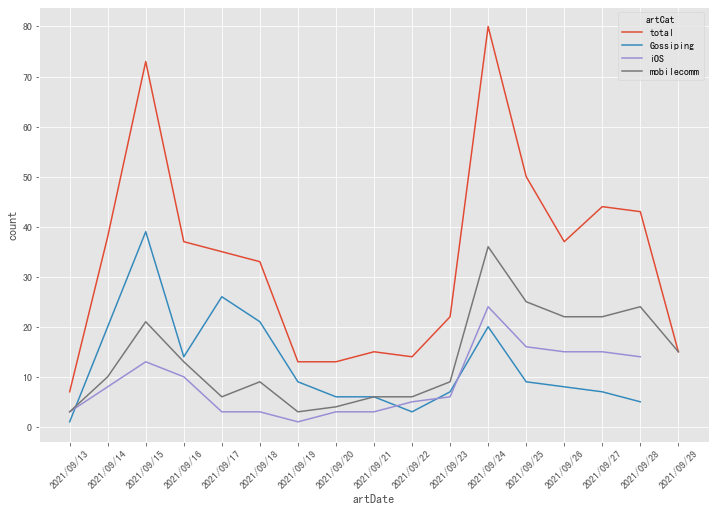

In [415]:
plt.figure(figsize = (12,8))
sns.lineplot(x="artDate", y="count", hue='artCat', dashes=False , data=data_datecount_cat)
plt.xticks(rotation=45)
#各版發文量的尖峰時點分別出現在9/15發表日及9/24發售日

各版文字雲


In [416]:
def Wc_dict(df, cat, countS):
    wc_df = (df.query('artCat == @cat') # 篩選日期
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #建立成dictionary
    
    return wc_dict

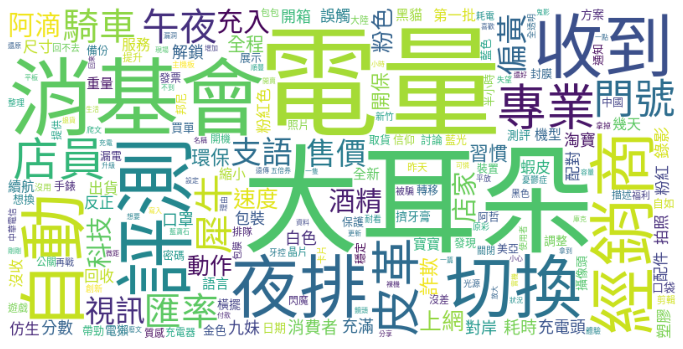

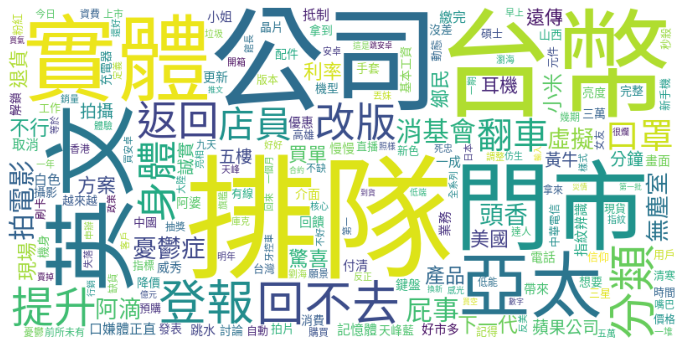

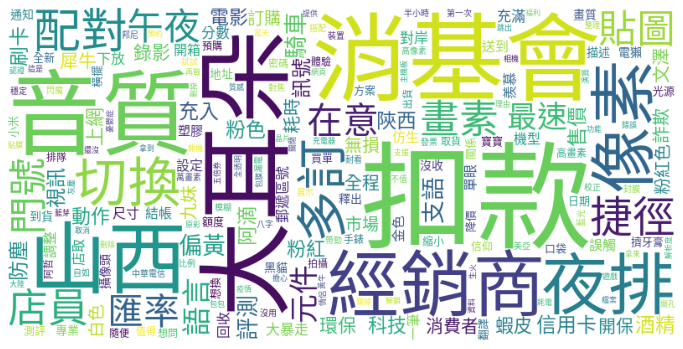

In [417]:
#ios版
dict1 = Wc_dict(word_count,'iOS',4)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict1)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

#八卦版
dict2 = Wc_dict(word_count,'Gossiping',4)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict2)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

#手機通訊版
dict3 = Wc_dict(word_count,'mobilecomm',4)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict3)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

#文字雲方面三個版都同時有在關注如何購買的問題，而ios跟手機通訊版還有另一個關心的主題為評測，此外手機通訊版在iphone13規格方面也有討論的聲量。

## 情緒分析

載入情緒字典

In [418]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])

df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

,word,sentiments
0,一無所有,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1706,魅力,positive
1707,鮮明,positive
1708,鮮美,positive
1709,鼓勵,positive


In [419]:
#文章和與LIWC情緒字典做合併
data_liwc = pd.merge(df, df_liwc, on=['word'],how='left')

#算出每天情緒總和(sentiment_count)
sentiment_count_cat = data_liwc.groupby(['artDate','artCat','sentiments'],as_index=False).size()
sentiment_count= data_liwc.groupby(['artDate','sentiments'],as_index=False).size()
sentiment_count['artCat']='total'
sentiment_count_cat = pd.concat([sentiment_count,sentiment_count_cat]).reset_index()
sentiment_count_cat

,index,artDate,sentiments,size,artCat
0,0,2021-09-13,negative,71,total
1,1,2021-09-13,positive,50,total
2,2,2021-09-14,negative,131,total
3,3,2021-09-14,positive,140,total
4,4,2021-09-15,negative,313,total
...,...,...,...,...,...
125,91,2021-09-28,positive,26,iOS
126,92,2021-09-28,negative,40,mobilecomm
127,93,2021-09-28,positive,78,mobilecomm
128,94,2021-09-29,negative,28,mobilecomm


正負面文章數統計

In [420]:
article_type = (df.merge(df_liwc, on='word')
                .groupby(['artUrl', 'artCat','sentiments'], as_index=False)
                .size()
                .pivot_table(index=['artUrl','artCat'], columns='sentiments', values='size', fill_value=0)
                .reset_index(['artUrl'])
               )
article_type.head()

sentiments,artUrl,negative,positive
artCat,,,
Gossiping,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,7,6
Gossiping,https://www.ptt.cc/bbs/Gossiping/M.1631582109....,0,1
Gossiping,https://www.ptt.cc/bbs/Gossiping/M.1631623860....,2,0
Gossiping,https://www.ptt.cc/bbs/Gossiping/M.1631624401....,1,3
Gossiping,https://www.ptt.cc/bbs/Gossiping/M.1631642229....,1,0


In [421]:
article_type['type'] = article_type.apply(lambda x: 'positive' if x['positive'] > x['negative'] else 'negative',axis=1)
article_type.groupby(['type','artCat'], as_index=False).size()


,type,artCat,size
0,negative,Gossiping,119
1,negative,iOS,53
2,negative,mobilecomm,86
3,positive,Gossiping,55
4,positive,iOS,76
5,positive,mobilecomm,122


### 視覺化part2

正負面文章數圖

In [422]:
article_type_date = article_type.merge(content.loc[:,["artUrl", "artDate",'artCat']], how = 'left', on = 'artUrl')
article_type_date

,artUrl,negative,positive,type,artDate,artCat
0,https://www.ptt.cc/bbs/Gossiping/M.1631527152....,7,6,negative,2021/09/13,Gossiping
1,https://www.ptt.cc/bbs/Gossiping/M.1631582109....,0,1,positive,2021/09/14,Gossiping
2,https://www.ptt.cc/bbs/Gossiping/M.1631623860....,2,0,negative,2021/09/14,Gossiping
3,https://www.ptt.cc/bbs/Gossiping/M.1631624401....,1,3,positive,2021/09/14,Gossiping
4,https://www.ptt.cc/bbs/Gossiping/M.1631642229....,1,0,negative,2021/09/14,Gossiping
...,...,...,...,...,...,...
764,https://www.ptt.cc/bbs/iOS/M.1632895623.A.5C1....,9,3,negative,2021/09/29,mobilecomm
765,https://www.ptt.cc/bbs/iOS/M.1632906053.A.C92....,0,2,positive,2021/09/29,mobilecomm
766,https://www.ptt.cc/bbs/iOS/M.1632915172.A.6DE....,5,6,positive,2021/09/29,mobilecomm
767,https://www.ptt.cc/bbs/iOS/M.1632921815.A.1DF....,1,1,negative,2021/09/29,mobilecomm


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

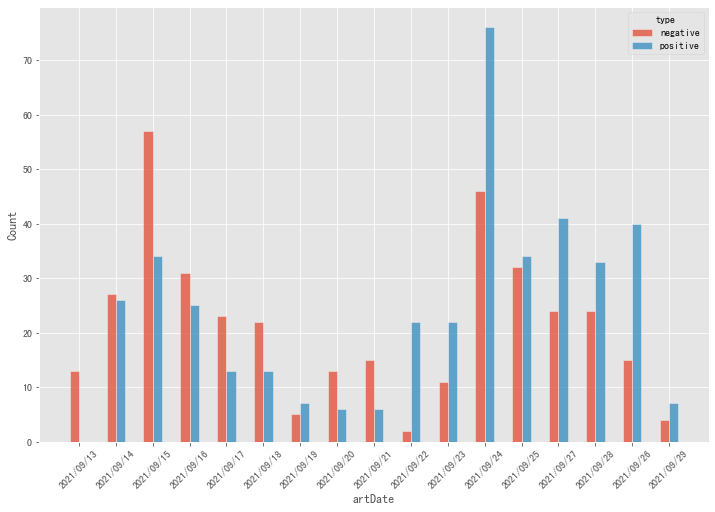

In [423]:
plt.figure(figsize = (12,8))
sns.histplot(x='artDate',hue='type',multiple='dodge',shrink=0.5,data=article_type_date)
plt.xticks(rotation=45)
#負面情緒文章數在發表日來到了最高峰，而正面文章數則是在發售日來到最高峰

各版每日情緒分數折線圖

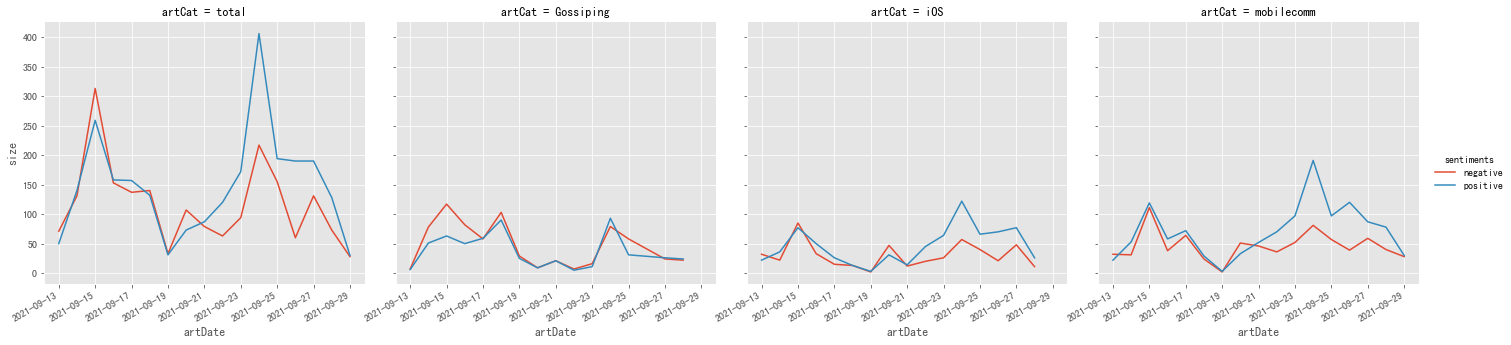

In [424]:
ax=sns.relplot(x="artDate", y="size", hue="sentiments",kind='line',
          col = "artCat" , data=sentiment_count_cat)
ax.fig.autofmt_xdate() 
#從情緒分數來看，發表日八卦版的負面情緒是大於正面情緒的，ios版與機通訊版則是沒有明顯的差異。
#而在發售日當日三個版都是正面情緒比較多，但八卦版的正負面情緒分數差異沒有其他兩個版來的大，而且在發表日過後八卦版的負面情緒又再度超過正面情緒。

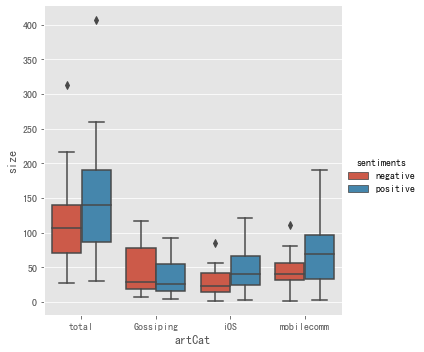

In [425]:
sns.catplot(x="artCat",y='size',hue='sentiments',data=sentiment_count_cat,kind='box')
#負面的離群值都出現在9/15蘋果發表會當天,而在加總分數來看正面的離群值則是出現在9/24開賣當天

各版每日情緒比例折線圖

In [426]:
sentiment_count_r = sentiment_count_cat.assign(ratio = sentiment_count_cat.groupby(['artDate','artCat'], as_index=False)
                                           .apply(lambda x: x['size'] / sum(x['size'])).reset_index(level=0, drop=True))

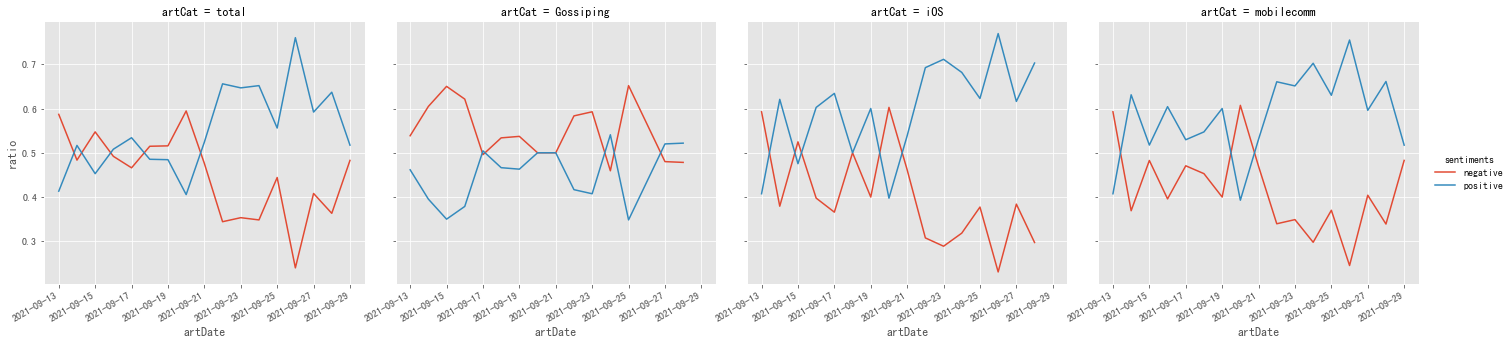

In [427]:
ax=sns.relplot(x="artDate", y="ratio", hue="sentiments",kind='line',
          col = "artCat" , data=sentiment_count_r)
ax.fig.autofmt_xdate() 
#在情緒比例方面可以看到三個版在發售日這天負面情緒的比例都有明顯的上升。
#從情緒比例與情緒分數總結來看，三個版都讓人有種口嫌體正直的感覺。

### 情緒代表字

In [428]:
sentiment_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['word','artCat' ,'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_sum = sentiment_sum.sort_values(by=['size'], ascending=False)  
sentiment_sum.head()

,word,artCat,sentiments,size
12,保護,mobilecomm,positive,101
6,不錯,mobilecomm,positive,99
11,保護,iOS,positive,76
5,不錯,iOS,positive,56
27,可憐,Gossiping,negative,53


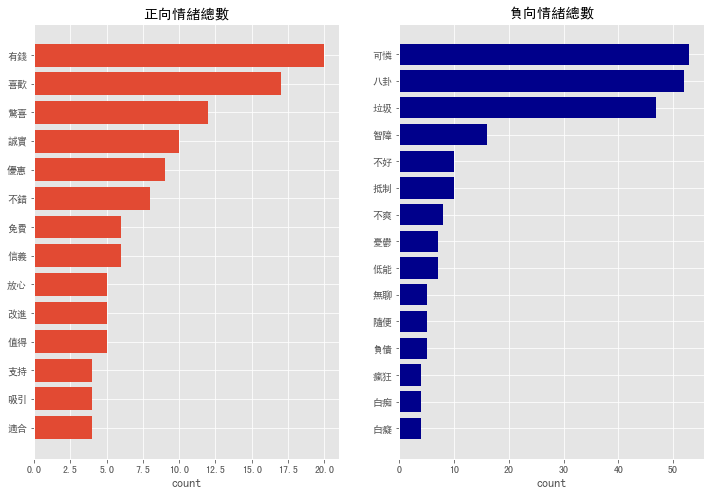

In [429]:
#八卦版情緒字統計
sentiment_sum_gossiping=sentiment_sum.loc[sentiment_sum['artCat']=='Gossiping']
p_sum = sentiment_sum_gossiping[sentiment_sum_gossiping["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum_gossiping[sentiment_sum_gossiping["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

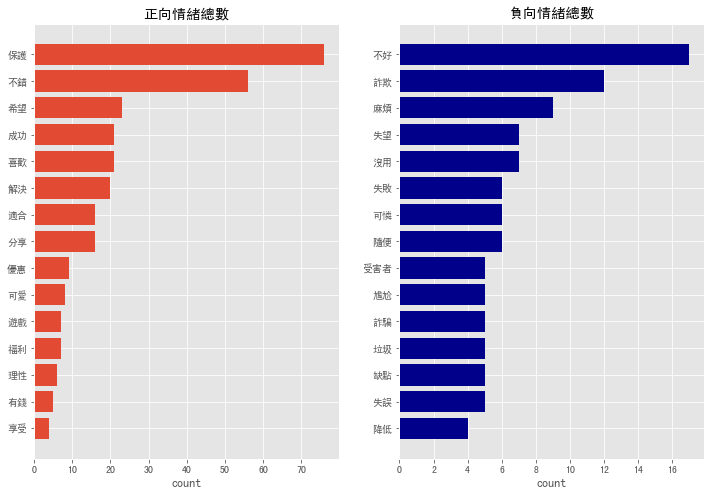

In [430]:
#ios版情緒字統計
sentiment_sum_iOS=sentiment_sum.loc[sentiment_sum['artCat']=='iOS']
p_sum = sentiment_sum_iOS[sentiment_sum_iOS["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum_iOS[sentiment_sum_iOS["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

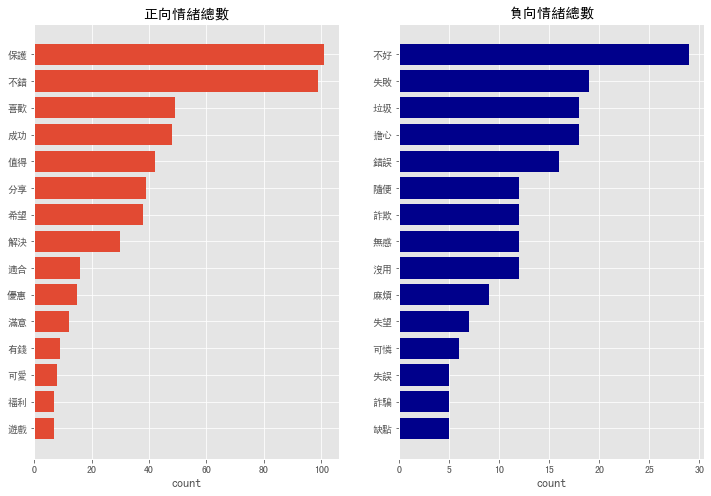

In [431]:
#手機通訊版情緒字統計
sentiment_sum_mobilecomm=sentiment_sum.loc[sentiment_sum['artCat']=='mobilecomm']
p_sum = sentiment_sum_mobilecomm[sentiment_sum_mobilecomm["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum_mobilecomm[sentiment_sum_mobilecomm["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

### 分別查看9/15及9/24的情緒字及文字雲

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 8 artists>

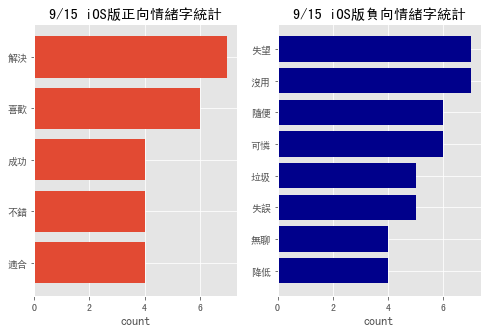

In [432]:
#9/15 ios版情緒字統計
sentiment_sum_date = (word_count.merge(df_liwc, on='word')
                 .groupby(['word','artCat' ,'sentiments','artDate'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_0915 = sentiment_sum_date[sentiment_sum_date['artDate']=="2021-09-15"].sort_values(by=['size'], ascending=False)
sentiment_0915_iOS=sentiment_0915[sentiment_sum_date['artCat']=="iOS"]

p_sum = sentiment_0915_iOS[sentiment_0915_iOS["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0915_iOS[sentiment_0915_iOS["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('9/15 iOS版正向情緒字統計')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('9/15 iOS版負向情緒字統計')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 1 artists>

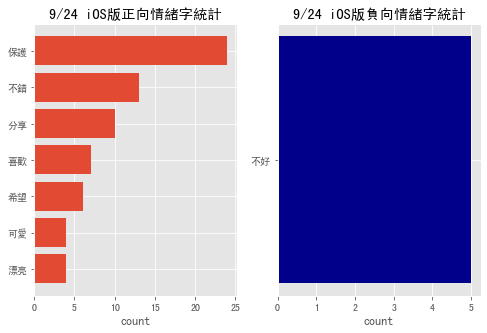

In [433]:
##9/24 ios版情緒字統計
sentiment_0924 = sentiment_sum_date[sentiment_sum_date['artDate']=="2021-09-24"].sort_values(by=['size'], ascending=False)
sentiment_0924_iOS=sentiment_0924[sentiment_sum_date['artCat']=="iOS"]

p_sum = sentiment_0924_iOS[sentiment_0924_iOS["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0924_iOS[sentiment_0924_iOS["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('9/24 iOS版正向情緒字統計')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('9/24 iOS版負向情緒字統計')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 9 artists>

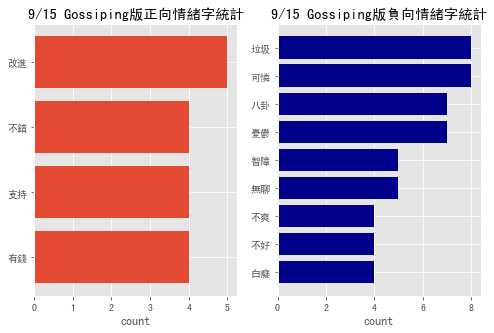

In [434]:
#9/15 八卦版情緒字統計
sentiment_0915_Gossiping=sentiment_0915[sentiment_sum_date['artCat']=="Gossiping"]

p_sum = sentiment_0915_Gossiping[sentiment_0915_Gossiping["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0915_Gossiping[sentiment_0915_Gossiping["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('9/15 Gossiping版正向情緒字統計')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('9/15 Gossiping版負向情緒字統計')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 4 artists>

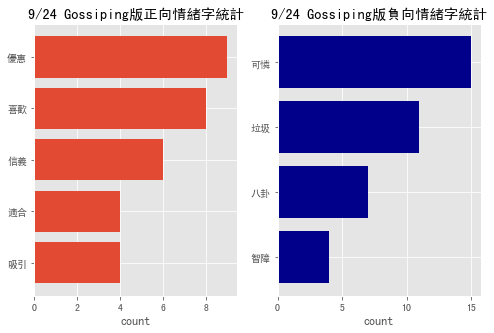

In [435]:
#9/24 八卦版情緒字統計
sentiment_0924_Gossiping=sentiment_0924[sentiment_sum_date['artCat']=="Gossiping"]

p_sum = sentiment_0924_Gossiping[sentiment_0924_Gossiping["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0924_Gossiping[sentiment_0924_Gossiping["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('9/24 Gossiping版正向情緒字統計')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('9/24 Gossiping版負向情緒字統計')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 9 artists>

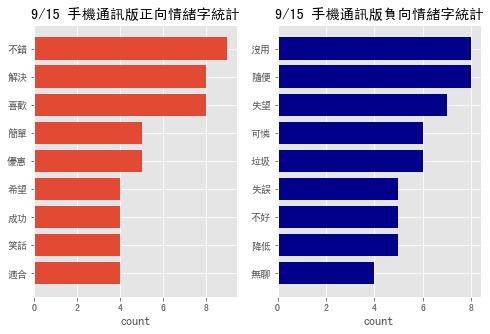

In [436]:
#9/15 手機通訊版情緒字統計
sentiment_0915_mobilecomm=sentiment_0915[sentiment_sum_date['artCat']=="mobilecomm"]

p_sum = sentiment_0915_mobilecomm[sentiment_0915_mobilecomm["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0915_mobilecomm[sentiment_0915_mobilecomm["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('9/15 手機通訊版正向情緒字統計')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('9/15 手機通訊版負向情緒字統計')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 3 artists>

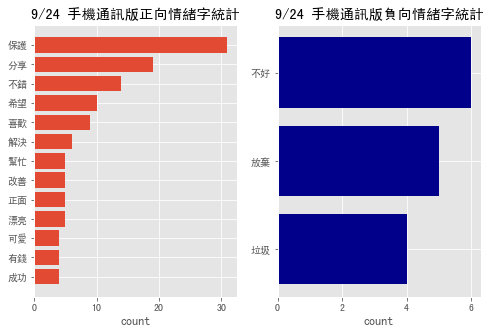

In [437]:
#9/24 手機通訊版情緒字統計
sentiment_0924_mobilecomm=sentiment_0924[sentiment_sum_date['artCat']=="mobilecomm"]

p_sum = sentiment_0924_mobilecomm[sentiment_0924_mobilecomm["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0924_mobilecomm[sentiment_0924_mobilecomm["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('9/24 手機通訊版正向情緒字統計')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('9/24 手機通訊版負向情緒字統計')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")

In [438]:
def Wc_dict2(df,Date, cat, countS):
    wc_df2 = (df.query('artDate == @Date')
                .query('artCat == @cat') # 篩選日期
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict2 = dict(zip(wc_df2['word'], wc_df2['size'])) #建立成dictionary
    
    return wc_dict2

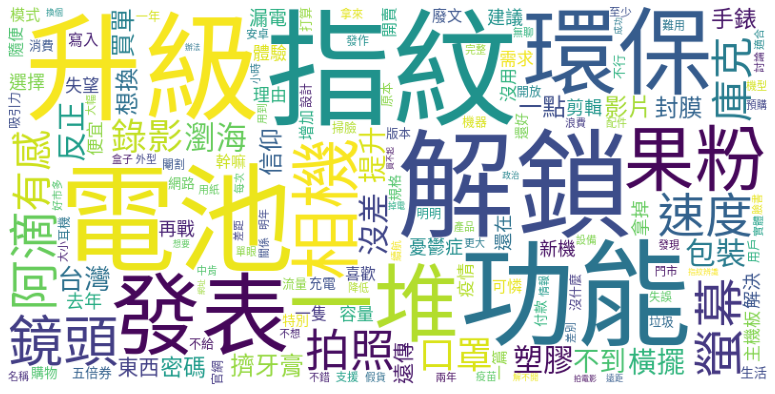

In [439]:
#9/15 ios版文字雲
dict3 = Wc_dict2(word_count,"2021-09-15",'iOS',1)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict3)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()
#ios版著重在功能的討論並且感覺蘋果是在擠牙膏。

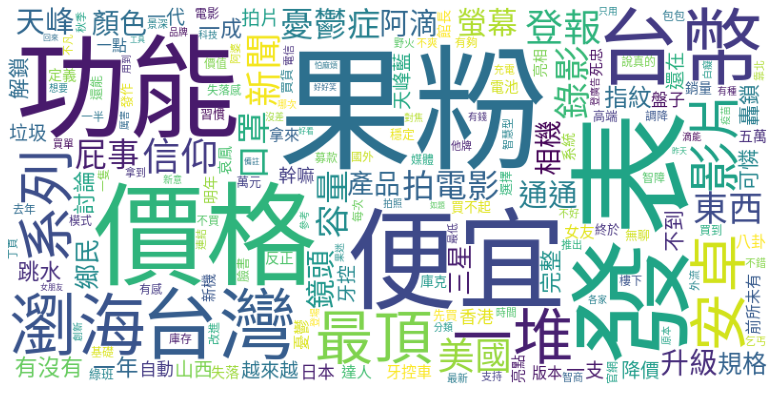

In [440]:
#9/15 八卦版文字雲
dict4 = Wc_dict2(word_count,"2021-09-15",'Gossiping',1)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict4)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()
#八卦版則是把蘋果拿來跟安卓比較，買蘋果等同於買信仰的討論

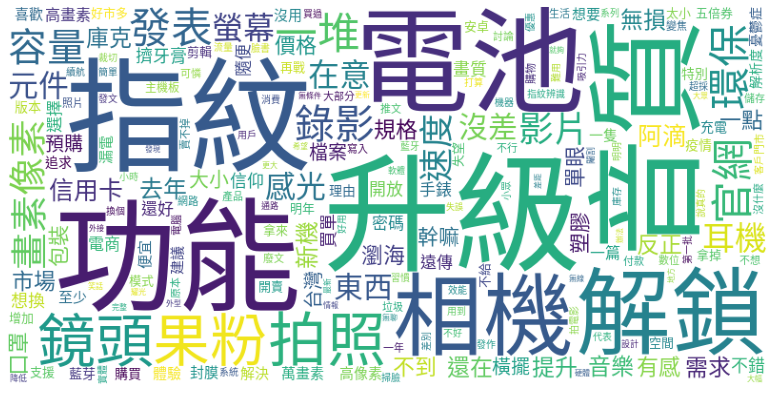

In [441]:
#9/15 手機通訊版文字雲
dict5 = Wc_dict2(word_count,"2021-09-15",'mobilecomm',1)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict5)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()
#手機通訊版則是比ios版更著重在規格的討論。

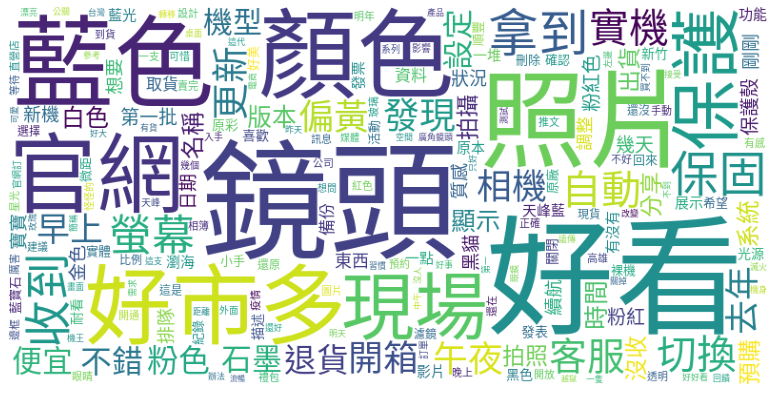

In [442]:
#9/24 ios版文字雲
dict6 = Wc_dict2(word_count,"2021-09-24",'iOS',1)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict6)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()
#ios版大多是對於顏色的評論以及拿到新機的評論。

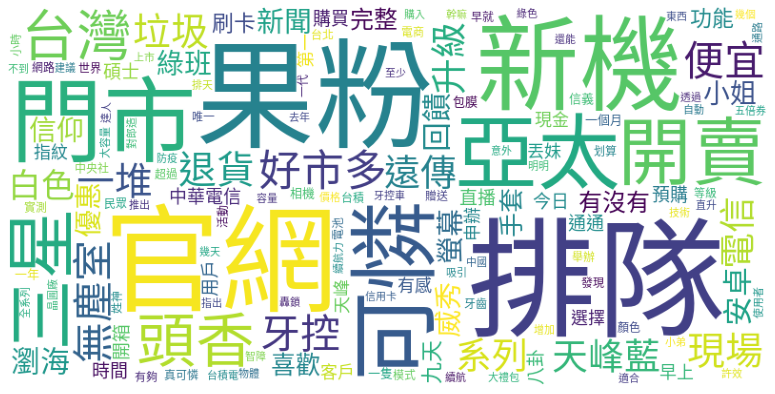

In [443]:
#9/24 八卦版文字雲
dict7 = Wc_dict2(word_count,"2021-09-24",'Gossiping',1)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict7)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()
#八卦版則是著重在新機的搶購，在負面或者看似嘲諷的字較其他兩個版多

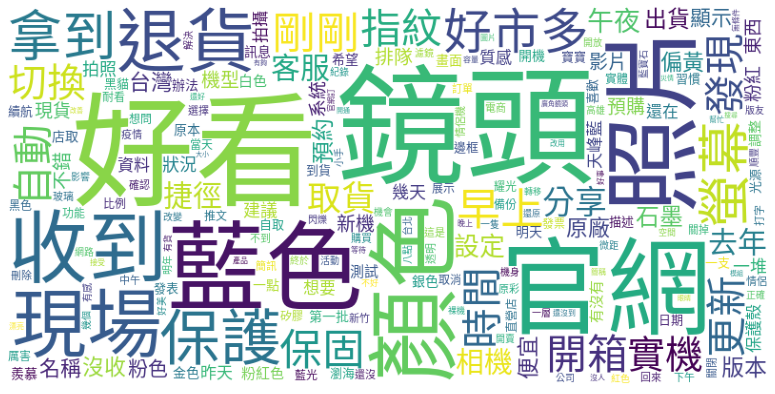

In [444]:
#9/24 手機通訊版文字雲
dict8 = Wc_dict2(word_count,"2021-09-24",'mobilecomm',1)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict8)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()
#手機通訊版也是著重在拿到新機以及顏色的討論